Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd 
import os
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

from pyspark.sql.functions import round
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

In [2]:
from scipy import stats

In [3]:
df = pd.read_csv(r"c:\Users\REBU\Downloads\flights-larger (1).csv")

In [4]:
print(df)

        mon  dom  dow carrier  flight  org  mile  depart  duration  delay
0        10   10    1      OO    5836  ORD   157    8.18        51   27.0
1         1    4    1      OO    5866  ORD   466   15.50       102    NaN
2        11   22    1      OO    6016  ORD   738    7.17       127  -19.0
3         2   14    5      B6     199  JFK  2248   21.17       365   60.0
4         5   25    3      WN    1675  SJC   386   12.92        85   22.0
...     ...  ...  ...     ...     ...  ...   ...     ...       ...    ...
274995    4   31    6      UA     259  ORD   888   16.75       154   46.0
274996    3   14    1      UA     119  SFO   337   16.20        84   33.0
274997   10    4    2      AA     716  ORD  1005    7.00       155   -6.0
274998    9   27    1      B6     128  JFK   267   22.50        86  -19.0
274999    6   15    2      OH    5552  JFK   301    9.08       105  -15.0

[275000 rows x 10 columns]


AttributeError: 'numpy.int64' object has no attribute 'isnull'

In [ ]:
# Handle Missing Values
df.dropna(inplace=True)  # Drop rows with missing values, or use another method to impute
 = df.isnull().sum()


In [12]:


# Identify Outliers using Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
threshold = 3
outliers = np.where(z_scores > threshold)

# Remove Outliers
data = df[(z_scores < threshold).all(axis=1)]

# Select only numeric columns for calculating quartiles
numeric_data = data.select_dtypes(include=np.number)

# Calculate quartiles using IQR method
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers_iqr = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
data = data[~outliers_iqr]

In [13]:
print(df)

        mon  dom  dow carrier  flight  org  mile  depart  duration  delay
0        10   10    1      OO    5836  ORD   157    8.18        51   27.0
2        11   22    1      OO    6016  ORD   738    7.17       127  -19.0
3         2   14    5      B6     199  JFK  2248   21.17       365   60.0
4         5   25    3      WN    1675  SJC   386   12.92        85   22.0
5         3   28    1      B6     377  LGA  1076   13.33       182   70.0
...     ...  ...  ...     ...     ...  ...   ...     ...       ...    ...
274995    4   31    6      UA     259  ORD   888   16.75       154   46.0
274996    3   14    1      UA     119  SFO   337   16.20        84   33.0
274997   10    4    2      AA     716  ORD  1005    7.00       155   -6.0
274998    9   27    1      B6     128  JFK   267   22.50        86  -19.0
274999    6   15    2      OH    5552  JFK   301    9.08       105  -15.0

[258289 rows x 10 columns]


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


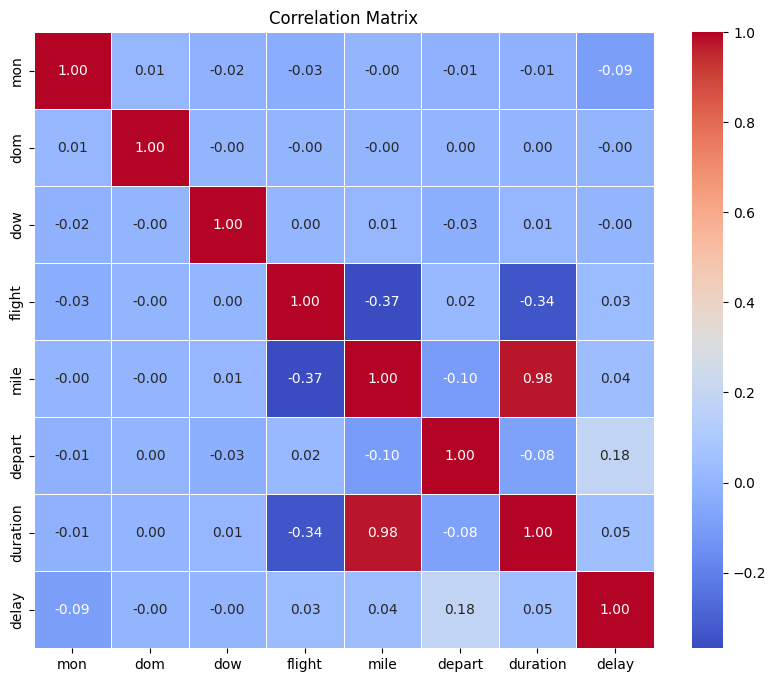

In [17]:
# Filter out non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Save the preprocessed dataset
data.to_csv("preprocessed_dataset.csv", index=False)

In [21]:
data.count()

mon         206019
dom         206019
dow         206019
carrier     206019
flight      206019
org         206019
mile        206019
depart      206019
duration    206019
delay       206019
dtype: int64